In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from src.data.compute_zscores import compute_fundamental_zscores
from src.data.load_data import load_all_fundamentals, get_all_returns_fundamental, adapt_benchmark
from src.signals.fundamental.dataset_regression_alpha_result import plot_analyse_alpha_target,create_fundamental_dataset, train_ridge_on_fundamental_alpha
from src.strategy.long_short_symetrical_strategy import plot_long_short_quantile_strategy, backtest_long_short_neutral
from src.evaluation.strategy_indicators import evaluate_long_short_results
dfs = load_all_fundamentals()
df_z = compute_fundamental_zscores(dfs)
df_returns = get_all_returns_fundamental(df_z)

YF.download() has changed argument auto_adjust default to True


In [3]:
dataset = create_fundamental_dataset(df_z, df_returns)
dataset.head(10)

,date,ticker,FCF_Yield,ROIC,Gearing,Revenue_Growth_YOY,target
0,2021-12-31,AIR.PA,0.142041,-0.068487,-0.508354,NaN,-0.138049
1,2022-12-31,AIR.PA,0.076543,0.475111,-0.555737,0.148230,-0.051870
2,2023-12-31,AIR.PA,0.067690,0.154229,-0.610542,0.068026,0.040363
3,2024-03-31,AIR.PA,0.115067,0.061301,-0.538770,NaN,-0.242260
4,2024-06-30,AIR.PA,0.413577,-0.398473,-0.455341,NaN,-0.080132
5,2024-09-30,AIR.PA,-0.193711,0.278698,-0.502764,NaN,0.138835
6,2024-12-31,AIR.PA,0.280230,-0.100859,-0.426841,-0.500589,-0.046709
7,2021-12-31,SAF.PA,-0.017876,-0.514050,-0.522737,NaN,-0.048815
8,2022-12-31,SAF.PA,-0.057900,-1.767137,-0.473522,1.921703,0.048350
9,2023-12-31,SAF.PA,0.126753,1.566506,-0.558391,1.468916,0.069523


In [4]:
weights, model, scaler, df_clean = train_ridge_on_fundamental_alpha(dataset)
df_clean.head(5)

,date,ticker,FCF_Yield,ROIC,Gearing,Revenue_Growth_YOY,target,alpha
1,2022-12-31,AIR.PA,0.076543,0.475111,-0.555737,0.148230,-0.051870,0.064465
2,2023-12-31,AIR.PA,0.067690,0.154229,-0.610542,0.068026,0.040363,0.088245
6,2024-12-31,AIR.PA,0.280230,-0.100859,-0.426841,-0.500589,-0.046709,0.061063
8,2022-12-31,SAF.PA,-0.057900,-1.767137,-0.473522,1.921703,0.048350,0.237942
9,2023-12-31,SAF.PA,0.126753,1.566506,-0.558391,1.468916,0.069523,0.048669


Régression linéaire :
  pente (slope)       = 1.2213
  intercept           = -0.0010
  R² (from linregress)= 0.2531
  Corr (Pearson)      = 0.5031
  p-value régression  = 0.0003657
  p-value Pearson     = 0.0003657
  erreur std pente    = 0.3163


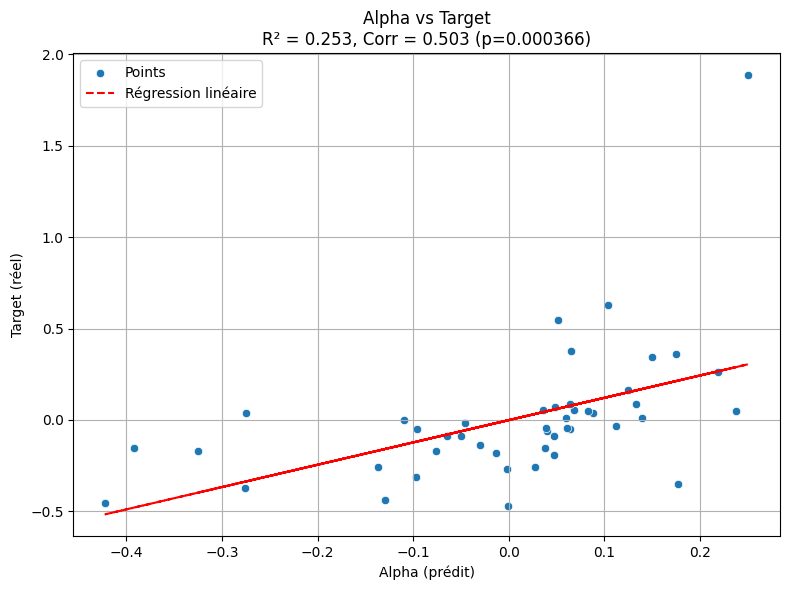

{'slope': np.float64(1.2213203686277099),
 'intercept': np.float64(-0.0010097250589927598),
 'r_squared': np.float64(0.2531198764941248),
 'correlation': np.float64(0.5031102031306111),
 'p_value_linreg': np.float64(0.00036567843131753234),
 'p_value_corr': np.float64(0.00036567843131753467),
 'std_error': np.float64(0.3162755268484425)}

In [5]:
plot_analyse_alpha_target(df_clean)

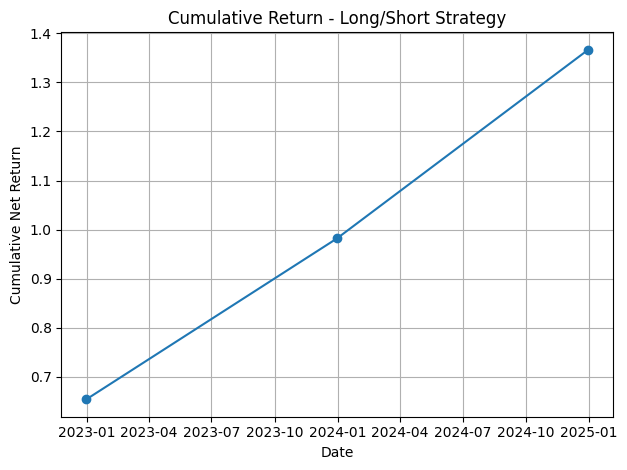

        date  long_return  short_return  long_count  short_count  net_return
0 2022-12-31     0.382728     -0.271525           5            5    0.654252
1 2023-12-31     0.147765     -0.179943           5            5    0.327708
2 2024-12-31     0.281232     -0.103217           3            3    0.384448


In [6]:
perf_df = backtest_long_short_neutral(df_clean)
plot_long_short_quantile_strategy(perf_df)

In [8]:
benchmark_df = adapt_benchmark(perf_df)
benchmark_df

c:\Users\ALrig\PROJET-QUANT\alpha-aero-europe\src\data\load_data.py:49: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = price_df.pct_change().dropna()


,date,benchmark_return
0,2022-12-31,0.202782
1,2023-12-31,0.314599
2,2024-12-31,0.336376


In [9]:
evaluate_long_short_results(perf_df, benchmark_df)

(        date  long_return  short_return  long_count  short_count  net_return  \
 0 2023-12-31     0.147765     -0.179943           5            5    0.327708   
 1 2024-12-31     0.281232     -0.103217           3            3    0.384448   
 
    benchmark_return  excess_return  
 0          0.314599       0.013109  
 1          0.336376       0.048072  ,
 {'Annual Return': np.float64(0.3557813694105816),
  'Information Ratio': np.float64(1.2373408739911813),
  'Max Drawdown': np.float64(0.0),
  'Alpha': np.float64(-0.4919876009449482),
  'Beta': np.float64(2.6055246939023777),
  'Correlation': np.float64(1.0),
  'R²': np.float64(1.0)},
         date  long_return  short_return  long_count  short_count  net_return  \
 1 2024-12-31     0.281232     -0.103217           3            3    0.384448   
 0 2023-12-31     0.147765     -0.179943           5            5    0.327708   
 
    benchmark_return  excess_return  
 1          0.336376       0.048072  
 0          0.314599       0.013

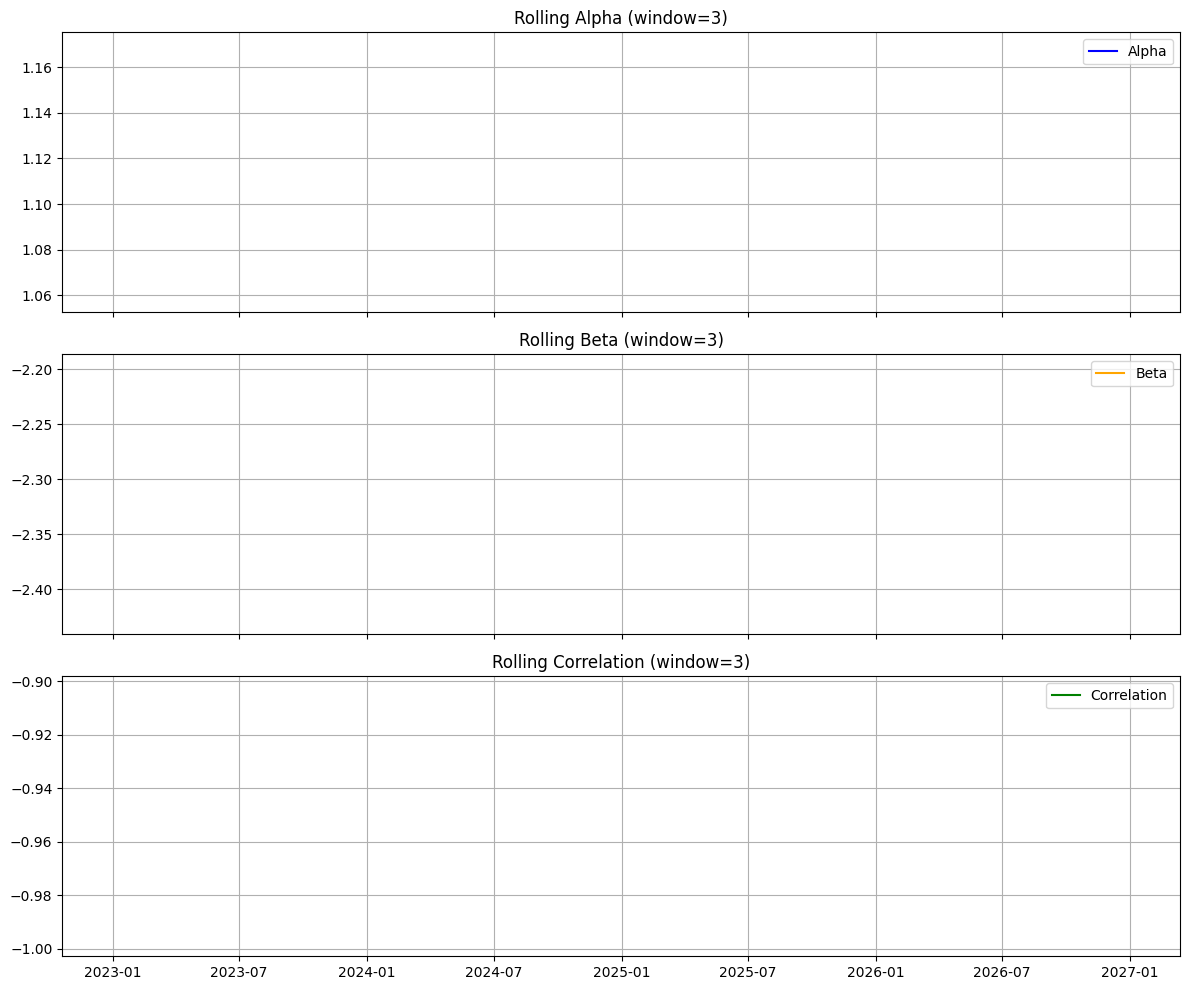

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_over_time(df_strategy: pd.DataFrame, df_benchmark: pd.DataFrame, window: int = 3):
    df_strategy = df_strategy.sort_values("date").reset_index(drop=True)
    df_benchmark = df_benchmark.sort_values("date").reset_index(drop=True)

    df = pd.merge(df_strategy, df_benchmark, on="date", how="inner")
    
    df["alpha"] = np.nan
    df["beta"] = np.nan
    df["corr"] = np.nan

    for i in range(window - 1, len(df)):
        y = df.loc[i - window + 1:i, "net_return"]
        x = df.loc[i - window + 1:i, "benchmark_return"]
        if x.isnull().any() or y.isnull().any():
            continue
        slope, intercept, r_value, _, _ = stats.linregress(x, y)
        df.loc[i, "alpha"] = intercept
        df.loc[i, "beta"] = slope
        df.loc[i, "corr"] = r_value

    fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    axs[0].plot(df["date"], df["alpha"], label="Alpha", color="blue")
    axs[0].set_title(f"Rolling Alpha (window={window})")
    axs[0].grid(True)

    axs[1].plot(df["date"], df["beta"], label="Beta", color="orange")
    axs[1].set_title(f"Rolling Beta (window={window})")
    axs[1].grid(True)

    axs[2].plot(df["date"], df["corr"], label="Correlation", color="green")
    axs[2].set_title(f"Rolling Correlation (window={window})")
    axs[2].grid(True)

    for ax in axs:
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_metrics_over_time(perf_df, benchmark_df)